Handwriting Recognition using K-Means
The U.S. Postal Service has been using machine learning and scanning technologies since 1999. Because its postal offices have to look at roughly half a billion pieces of mail every day, they have done extensive research and developed very efficient algorithms for reading and understanding addresses. And not only the post office:

ATMs can recognize handwritten bank checks
Evernote can recognize handwritten task lists
Expensify can recognize handwritten receipts
But how do they do it?

In this project, you will be using K-means clustering (the algorithm behind this magic) and scikit-learn to cluster images of handwritten digits.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [2]:
# Loading the dataset digits from the sklearn library. The dataset gets imported as a dictionary
digits = datasets.load_digits()

# Examining the background and infos of the dataset
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
# Examining the datapoints of the dataset
print(digits.data)
print(digits.data[100])

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[ 0.  0.  0.  2. 13.  0.  0.  0.  0.  0.  0.  8. 15.  0.  0.  0.  0.  0.
  5. 16.  5.  2.  0.  0.  0.  0. 15. 12.  1. 16.  4.  0.  0.  4. 16.  2.
  9. 16.  8.  0.  0.  0. 10. 14. 16. 16.  4.  0.  0.  0.  0.  0. 13.  8.
  0.  0.  0.  0.  0.  0. 13.  6.  0.  0.]


In [4]:
# Examining the target variables (space of desired outputs from our model): 
print(digits.target)
print(max(digits.target)) # the biggest target variable is a 9 (obviously)
print(min(digits.target)) # the smallest target variable is a 0 (also pretty obvious)

[0 1 2 ... 8 9 8]
9
0


To gain further understanding of how exactly the digits are represented as pixels let's take a look at some of the visual representations of how the datapoints (the different pixels) translate to an image

<Figure size 640x480 with 0 Axes>

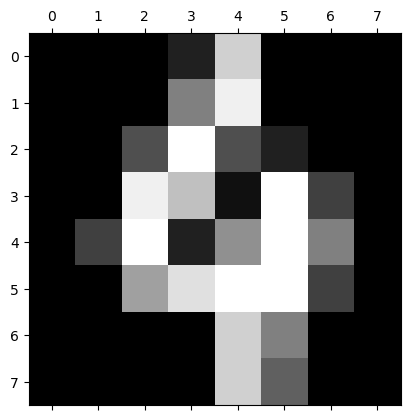

In [5]:
# Looking at the visual representation of the pixeled image in the dataset on index 100
plt.gray()
plt.matshow(digits.images[100])
plt.show()

In [6]:
# looks like maybe the nr 4? We can check this by printing the target variable at index 100
print(digits.target[100])
print(digits.images[100])

4
[[ 0.  0.  0.  2. 13.  0.  0.  0.]
 [ 0.  0.  0.  8. 15.  0.  0.  0.]
 [ 0.  0.  5. 16.  5.  2.  0.  0.]
 [ 0.  0. 15. 12.  1. 16.  4.  0.]
 [ 0.  4. 16.  2.  9. 16.  8.  0.]
 [ 0.  0. 10. 14. 16. 16.  4.  0.]
 [ 0.  0.  0.  0. 13.  8.  0.  0.]
 [ 0.  0.  0.  0. 13.  6.  0.  0.]]


<Figure size 640x480 with 0 Axes>

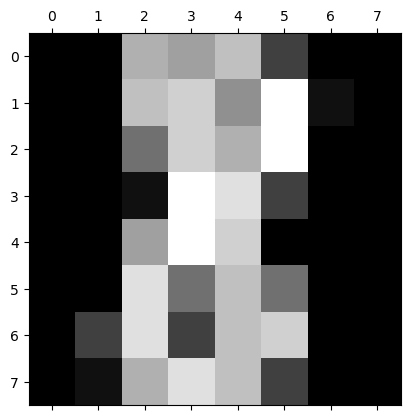

In [7]:
# Looking at the visual representation of the pixeled image in the dataset on index 40
plt.gray()
plt.matshow(digits.images[40])
plt.show()

In [8]:
# Could be a 3..or 6, or 8?
print(digits.target[40])

8


We now gained enough understanding of the data to make a classification model. Here we choose KMeans Clustering to cluster the specific images into 10 different clusters (to cluster numbers between 0 and 9)

In [9]:
#Importing and implementing the k-means method with 10 clusters
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 10, random_state = 100)

In [10]:
# Setting up the variables 

X = digits.data

In [11]:
# Creating the model using the data variables
model = k_means.fit(X)

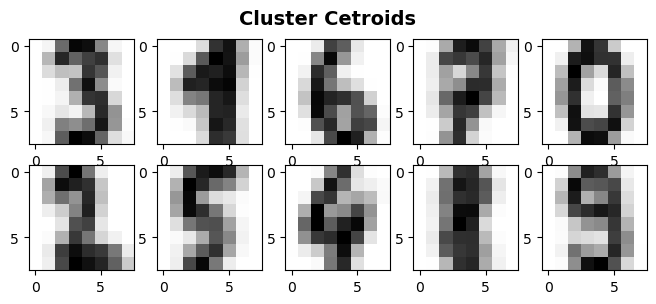

In [12]:
# Visualization of the centroids
fig = plt.figure(figsize = (8,3))
fig.suptitle("Cluster Cetroids", fontsize = 14, fontweight = "bold")

for i in range(10):
    # the subplot for each centroid in the global plot with a lattice of 2x5 for the positions from 1 to 10 (i+1)
    ax = fig.add_subplot(2, 5, i + 1)
    
    # display subplots reshaping the cluster point with dim = 17 to an 8x8 array
    ax.imshow(model.cluster_centers_[i].reshape((8,8)), cmap = plt.cm.binary)

plt.show()

The model associated the number 3 to the index 0, the number 1 to the index 1, the number 6 to the index 2 asf, so if the model outputs 0 from a given target variable the actual number should be a 3.

In [13]:
# Examine how the model performs using crosstable

prediction = model.predict(X)

predictions_transformed = []

for i in range(len(prediction)):
    if prediction[i] == 0:
        predictions_transformed.append(3)
    elif prediction[i] == 1:
        predictions_transformed.append(1)
    elif prediction[i] == 2:
        predictions_transformed.append(6)
    elif prediction[i] == 3:
        predictions_transformed.append(7)
    elif prediction[i] == 4:
        predictions_transformed.append(0)
    elif prediction[i] == 5:
        predictions_transformed.append(2)
    elif prediction[i] == 6:
        predictions_transformed.append(5)
    elif prediction[i] == 7:
        predictions_transformed.append(4)
    elif prediction[i] == 8:
        predictions_transformed.append(8)
    elif prediction[i] == 9:
        predictions_transformed.append(9) 

df = pd.DataFrame({"predicted_digits": np.array(predictions_transformed), "actual_digits": digits.target})

ct = pd.crosstab(df["predicted_digits"], df["actual_digits"])
print(ct)

actual_digits       0   1    2    3    4    5    6    7    8    9
predicted_digits                                                 
0                 177   0    1    0    0    0    1    0    0    0
1                   0  55    2    0    5    0    1    2    6   20
2                   0  24  148    1    0    0    0    0    3    0
3                   0   1   13  157    0    1    0    0    3    6
4                   1   0    0    0  164    2    0    0    0    0
5                   0   1    0    2    0  136    0    1    6    7
6                   0   2    0    0    0    1  177    0    2    0
7                   0   0    3    7    8    0    0  174    3    7
8                   0  99    8    7    4    0    2    2  100    1
9                   0   0    2    9    0   42    0    0   51  139


The model performs okay but not too well

In [14]:
print(digits.target)
print(np.array(predictions_transformed))

[0 1 2 ... 8 9 8]
[0 8 8 ... 8 9 9]


Testing the model on new data.
I used a matrix generator to generate the arrays of four different handwritten digits: 3241
The matrix is called new_samples below

<Figure size 640x480 with 0 Axes>

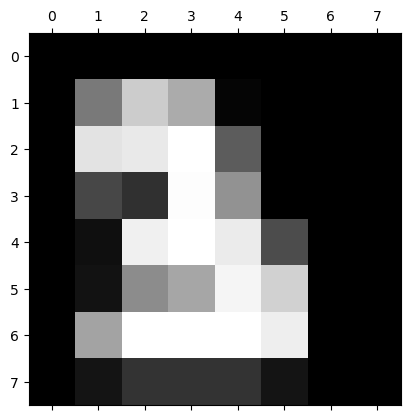

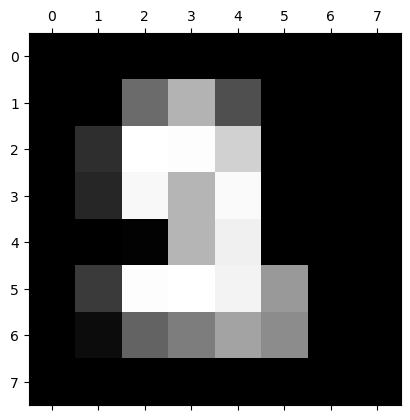

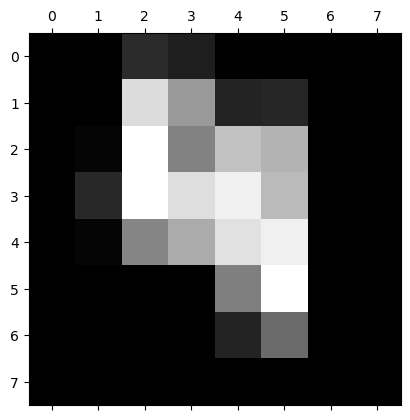

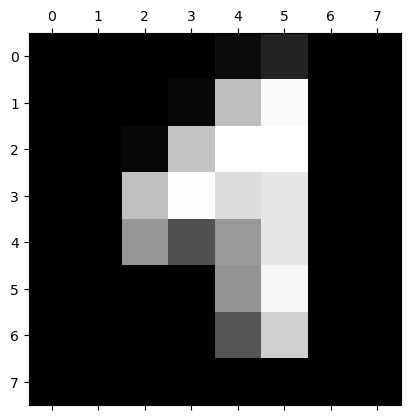

In [15]:
new_samples = np.array([
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.66,6.10,5.11,0.15,0.00,0.00,0.00,0.00,6.79,6.94,7.62,2.74,0.00,0.00,0.00,0.00,2.13,1.45,7.55,4.35,0.00,0.00,0.00,0.00,0.46,7.17,7.62,7.01,2.29,0.00,0.00,0.00,0.54,4.19,4.96,7.32,6.25,0.00,0.00,0.00,4.88,7.62,7.62,7.62,7.09,0.00,0.00,0.00,0.61,1.52,1.52,1.52,0.61,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.20,5.34,2.36,0.00,0.00,0.00,0.00,1.37,7.62,7.55,6.25,0.00,0.00,0.00,0.00,1.14,7.40,5.41,7.47,0.00,0.00,0.00,0.00,0.00,0.08,5.41,7.17,0.00,0.00,0.00,0.00,1.75,7.55,7.62,7.24,4.58,0.00,0.00,0.00,0.38,2.97,3.74,4.88,4.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,1.30,0.92,0.00,0.00,0.00,0.00,0.00,0.00,6.56,4.58,1.07,1.14,0.00,0.00,0.00,0.15,7.63,3.89,5.79,5.34,0.00,0.00,0.00,1.22,7.62,6.63,7.17,5.57,0.00,0.00,0.00,0.15,3.97,5.11,6.71,7.17,0.00,0.00,0.00,0.00,0.00,0.00,3.81,7.63,0.00,0.00,0.00,0.00,0.00,0.00,1.07,3.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,0.38,1.07,0.00,0.00,0.00,0.00,0.00,0.23,5.64,7.47,0.00,0.00,0.00,0.00,0.23,5.87,7.62,7.63,0.00,0.00,0.00,0.00,5.72,7.55,6.56,6.86,0.00,0.00,0.00,0.00,4.50,2.44,4.57,6.86,0.00,0.00,0.00,0.00,0.00,0.00,4.42,7.32,0.00,0.00,0.00,0.00,0.00,0.00,2.52,6.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00]
])
plt.gray()
for i in range(4):
    plt.matshow(new_samples[i].reshape(8,8))


In [16]:
# Using the model to predict the handwritten number 3241 (if the model performs accurate the number should be recognized)
new_labels = model.predict(new_samples)
print(new_labels)

[6 7 1 1]


In [17]:
# Transforming the digits
for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(3, end='')
  elif new_labels[i] == 1:
    print(1, end='')
  elif new_labels[i] == 2:
    print(6, end='')
  elif new_labels[i] == 3:
    print(7, end='')
  elif new_labels[i] == 4:
    print(0, end='')
  elif new_labels[i] == 5:
    print(2, end='')
  elif new_labels[i] == 6:
    print(4, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(8, end='')
  elif new_labels[i] == 9:
    print(9, end='')

4511

My handwriting must be really bad